In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt

In [2]:
# Load dataset
data = pd.read_csv('Wholesale customers data.csv')

In [3]:
# Data preprocessing
features = data.iloc[:, 2:]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

In [4]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_data = pca.fit_transform(scaled_data)

In [5]:
# Variance explained by each component
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")

Explained Variance Ratio: [0.44082893 0.283764  ]


In [6]:
# Fit One-Class SVM
svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.05)  # `nu` controls the outlier fraction
svm.fit(pca_data)

OneClassSVM(gamma='auto', nu=0.05)

In [7]:
# Predict anomalies
predictions = svm.predict(pca_data)

In [8]:
# Map predictions to -1 (outlier) and 1 (normal)
data['Anomaly'] = predictions

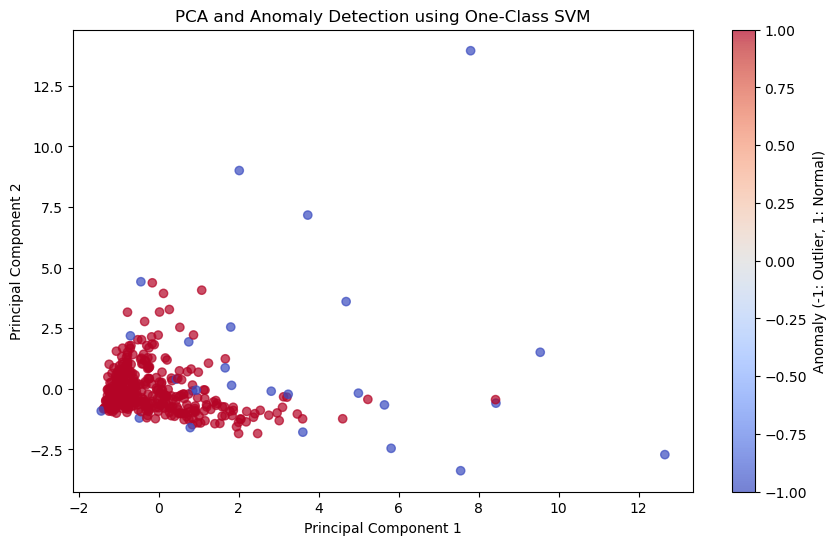

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Anomaly
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,1


In [9]:
# Visualize anomalies
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=predictions, cmap='coolwarm', alpha=0.7)
plt.title("PCA and Anomaly Detection using One-Class SVM")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Anomaly (-1: Outlier, 1: Normal)")
plt.show()

# Output data with anomaly labels
data.head()
